Computational Many-Body Physics

Exercise Sheet No. 2
Xiongxiao Wang Pulkit Kukreja

Exercise 1: TASEP (8 points) As shown in the lecture, the TASEP with parallel update corresponds to rule 184. Here we consider the TASEP with N = 50 sites and periodic boundary conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Confi: # create a configuration with n sites, n particles and Nt with the rule 184 
    def __init__(self,n_sites,n_particle,Nt,rule_n = 184):
        self.n_sites = n_sites
        self.n_particle = n_particle
        self.density = n_particle/n_sites
        self.Nt = Nt
        self.rule_n = rule_n
        self.num_N_1=0 # the number of particle transfer from position N to 1
        self.confi = self.create_starting_configuration()
        self.TASEP()
    
    def create_starting_configuration(self): # create a starting configuration
        z = np.zeros((1,self.n_sites),dtype = int)
        for i in range(self.n_particle):
            z[0][i] = 1
        np.random.shuffle(z[0])#Creat the initial configuration
        return z
        
    def Rule (self): # get the rule of TASEP
        rule_list = [0,0,0,0,0,0,0,0]
        rule_n = self.rule_n
        for i in range(8):
            rule_list[7-i] = rule_n%2
            rule_n=rule_n//2
        return rule_list
    
    def TASEP(self): #apply the rule of TASEP and get the whole configuration
        next_row = np.zeros(self.n_sites,dtype = int)
        for row_i in range(self.Nt):
            for i in range(self.n_sites):
                next_row [i]= self.Rule()[7-(self.confi[row_i,(i-1+self.n_sites)%self.n_sites]*4+self.confi[row_i,i]*2+self.confi[row_i,(i+1+n_sites)%self.n_sites]*1)] # apply the rule 184 with the boundary condition
            self.confi = np.append(self.confi,[next_row],axis=0)
            if self.confi[row_i,-1]==1 and self.confi[row_i,0]==0:
                self.num_N_1 +=1
    
    def average_flow(self): # get the average_flow 
        return self.num_N_1/self.Nt

a) Choose a random starting configuration with M particles (M ≈ 25) and calculate the average flow for Nt = 100 time steps. The flow is defined here as the number of particles per unit of time transferred from site N to site 1. (5 points)

0.49


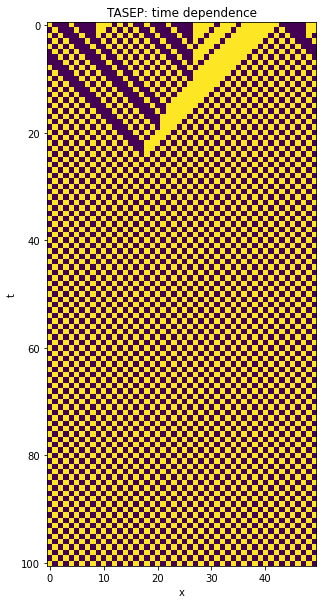

In [13]:
n_sites = 50 #set columns of the configuration
n_particle = 25
Nt = 100  # set number of generations
rule_n = 184 # set rule N
confi_25=Confi(n_sites,n_particle,Nt,rule_n)

plt.figure(figsize=(10,10)) 
plt.title('TASEP: time dependence')
plt.xlabel('x')
plt.ylabel('t')
plt.imshow(confi_25.confi)

print(confi_25.average_flow())

b) Calculate the fundamental diagram (flow versus density) for this model for 0 ≤ ρ ≤ 1 (ρ = M/N). Starting from a single configuration for each value of ρ is sufficient here, but the quality of the data improves when the flow is
averaged over many starting configurations. (3 points)

Text(0.5, 1.0, 'diagram (flow versus density)')

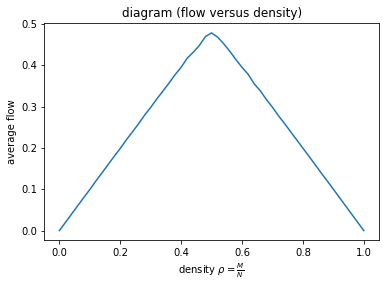

In [4]:
flow = np.zeros(n_sites+1)
density = np.zeros(n_sites+1)
repeat_times = 30
for n_par in range (n_sites+1):
    density[n_par]=Confi(n_sites,n_par,Nt,rule_n).density
    for times in range(repeat_times):
        flow[n_par] += Confi(n_sites,n_par,Nt,rule_n).average_flow()
    flow[n_par]=flow[n_par]/repeat_times

plt.plot(density,flow)
plt.xlabel(r'density $\rho = \frac {M}{N}$')
plt.ylabel('average flow')
plt.title('diagram (flow versus density)')

In [5]:
density

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [6]:
flow

array([0.        , 0.02      , 0.04      , 0.06      , 0.08      ,
       0.09933333, 0.12      , 0.13966667, 0.15966667, 0.17966667,
       0.19866667, 0.21966667, 0.23866667, 0.25833333, 0.27933333,
       0.298     , 0.31833333, 0.33733333, 0.35666667, 0.377     ,
       0.395     , 0.417     , 0.43133333, 0.448     , 0.46933333,
       0.478     , 0.46766667, 0.45166667, 0.43333333, 0.41333333,
       0.39466667, 0.378     , 0.355     , 0.338     , 0.317     ,
       0.29833333, 0.27733333, 0.25866667, 0.23866667, 0.219     ,
       0.19933333, 0.17966667, 0.15966667, 0.13933333, 0.12      ,
       0.1       , 0.08      , 0.06      , 0.04      , 0.02      ,
       0.        ])